In [41]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve)
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("customer-churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()
df["Churn"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
df["Partner"].unique()


array(['Yes', 'No'], dtype=object)

In [6]:
df["gender"].unique()


array(['Female', 'Male'], dtype=object)

In [7]:
df["SeniorCitizen"].unique()


array([0, 1])

In [8]:
df["Dependents"].unique()


array(['No', 'Yes'], dtype=object)

In [9]:
df["tenure"].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [10]:
df["MonthlyCharges"].describe()


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [11]:
df["TotalCharges"].dtype #should be numeric but its an object?



dtype('O')

In [12]:
(df["TotalCharges"] == " ").sum() # 11 blank strings


np.int64(11)

In [13]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") # TotalCharges has empty strings so they will be converted to NaN

In [14]:
df.dropna(inplace=True) #drop rows with missing values

In [15]:
df.drop("customerID", axis=1, inplace=True) #customerid aint helpful

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

#### target encoding

In [17]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0}) 

In [18]:
df["Churn"].head(10) 

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Churn, dtype: int64

#### categorical encoding

In [19]:
df = pd.get_dummies(df, drop_first=True) 

#### data splitting

In [20]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#### scaling

In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
def helper(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Some models need predict_proba, SVM needs special handling
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }


#### knn

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = helper(knn, X_train_scaled, X_test_scaled, y_train, y_test)
knn_scores


{'Accuracy': 0.7533759772565742,
 'Precision': 0.5361930294906166,
 'Recall': 0.5347593582887701,
 'ROC-AUC': 0.766680816478664}

#### logistic regression

In [31]:
log_reg = LogisticRegression(max_iter=1000)
log_scores = helper(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)
log_scores


{'Accuracy': 0.8038379530916845,
 'Precision': 0.6475903614457831,
 'Recall': 0.5748663101604278,
 'ROC-AUC': 0.8356727976766699}

#### svm linear

In [32]:
svm_linear = SVC(kernel="linear", probability=True)
svm_linear_scores = helper( svm_linear, X_train_scaled, X_test_scaled, y_train, y_test)
svm_linear_scores


{'Accuracy': 0.798862828713575,
 'Precision': 0.6408668730650154,
 'Recall': 0.553475935828877,
 'ROC-AUC': 0.8272773863571653}

#### svm rbf

In [36]:
svm_rbf = SVC(kernel="rbf", probability=True)
svm_rbf_scores = helper(svm_rbf, X_train_scaled, X_test_scaled, y_train, y_test)
svm_rbf_scores


{'Accuracy': 0.7867803837953091,
 'Precision': 0.6258503401360545,
 'Recall': 0.4919786096256685,
 'ROC-AUC': 0.7908536995718819}

#### decision trees

In [38]:
dt = DecisionTreeClassifier(random_state=42)
dt_scores = helper(dt, X_train, X_test, y_train, y_test)
dt_scores

{'Accuracy': 0.7185501066098081,
 'Precision': 0.4701086956521739,
 'Recall': 0.4625668449197861,
 'ROC-AUC': 0.636638004669438}

#### naive bayes

In [39]:
nb = GaussianNB()
nb_scores = helper(nb, X_train_scaled, X_test_scaled, y_train, y_test)
nb_scores


{'Accuracy': 0.644633972992182,
 'Precision': 0.4183937823834197,
 'Recall': 0.8636363636363636,
 'ROC-AUC': 0.8101824290395555}

#### random forest

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = helper(rf, X_train, X_test, y_train, y_test)
rf_scores

{'Accuracy': 0.7896233120113717,
 'Precision': 0.6258064516129033,
 'Recall': 0.5187165775401069,
 'ROC-AUC': 0.8164903116927489}

#### gradient boosting

In [43]:
gb = GradientBoostingClassifier(random_state=42)
gb_scores = helper(gb, X_train, X_test, y_train, y_test)
gb_scores


{'Accuracy': 0.7953091684434968,
 'Precision': 0.6378205128205128,
 'Recall': 0.5320855614973262,
 'ROC-AUC': 0.8406619005958451}

#### comparing all

In [44]:
results = pd.DataFrame.from_dict({
    "KNN": knn_scores,
    "Logistic Regression": log_scores,
    "SVM Linear": svm_linear_scores,
    "SVM RBF": svm_rbf_scores,
    "Decision Tree": dt_scores,
    "Naive Bayes": nb_scores,
    "Random Forest": rf_scores,
    "Gradient Boosting": gb_scores
}, orient="index")

results.sort_values("ROC-AUC", ascending=False)


,Accuracy,Precision,Recall,ROC-AUC
Gradient Boosting,0.795309,0.637821,0.532086,0.840662
Logistic Regression,0.803838,0.647590,0.574866,0.835673
SVM Linear,0.798863,0.640867,0.553476,0.827277
Random Forest,0.789623,0.625806,0.518717,0.816490
Naive Bayes,0.644634,0.418394,0.863636,0.810182
SVM RBF,0.786780,0.625850,0.491979,0.790854
KNN,0.753376,0.536193,0.534759,0.766681
Decision Tree,0.718550,0.470109,0.462567,0.636638


## ROC Curve 

In [61]:
# Get predicted probabilities
logreg_probs = log_reg.predict_proba(X_test)[:, 1]
gb_probs = gb.predict_proba(X_test)[:, 1]

# ROC curve values
fpr_log, tpr_log, _ = roc_curve(y_test, logreg_probs)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)

# AUC scores
auc_log = roc_auc_score(y_test, logreg_probs)
auc_gb = roc_auc_score(y_test, gb_probs)

print('logistic regression prob:', logreg_probs[:10])
print('gradient prob:', gb_probs[:10])
print()
print('fpr for logistic:', fpr_log[:10])
print('tpr for logistic:', tpr_log[:10])
print('fpr for gradient boosting:', fpr_gb[:10])
print('tpr for gradient boosting:', tpr_gb[:10])
print()
print('auc score for logistic:', auc_log)
print('auc score for gradient boosting:', auc_gb)



logistic regression prob: [1.         1.         1.         0.89391686 1.         1.
 1.         1.         1.         1.        ]
gradient prob: [0.02394121 0.5914853  0.0212927  0.14983496 0.08329697 0.44038329
 0.03377956 0.10330126 0.57539177 0.02489275]

fpr for logistic: [0.         0.91771539 0.91771539 0.9196515  0.9196515  0.92255566
 0.92255566 0.92545983 0.92545983 0.92739593]
tpr for logistic: [0.         0.71122995 0.71390374 0.71925134 0.72459893 0.72459893
 0.72727273 0.72727273 0.73262032 0.73262032]
fpr for gradient boosting: [0.         0.         0.         0.00096805 0.00096805 0.00193611
 0.00290416 0.00290416 0.00484027 0.00484027]
tpr for gradient boosting: [0.         0.0026738  0.04278075 0.04278075 0.06417112 0.07219251
 0.07219251 0.08823529 0.09358289 0.10695187]

auc score for logistic: 0.39258351408855363
auc score for gradient boosting: 0.8406619005958451


C:\Users\tina\practice\data-cleaning\netflixshows\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


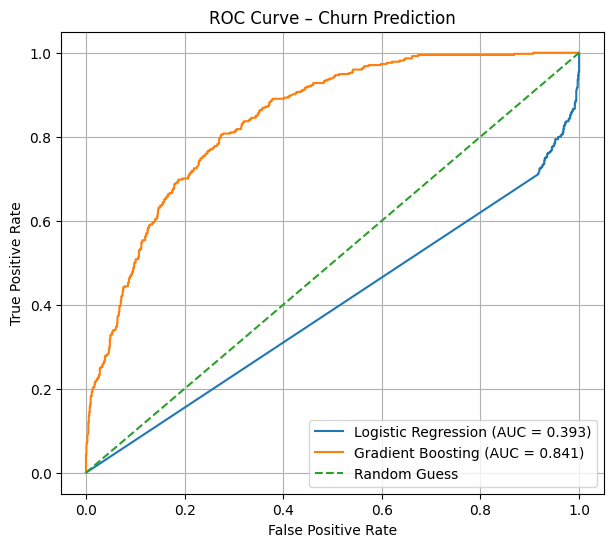

In [62]:
plt.figure(figsize=(7, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_gb:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Churn Prediction")
plt.legend()
plt.grid()
plt.show()

### Logistic Regression produced extreme probability estimates, leading to high recall but elevated false positives, while Gradient Boosting provided better-calibrated probabilities and cleaner ROC behavior.
## Gradient Boosting will be our final model

## feature importance

In [64]:
#LOGISTIC REGRESSION

# Get coefficients
logreg_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
})

# Sort by absolute impact
logreg_importance["AbsCoeff"] = logreg_importance["Coefficient"].abs()
logreg_importance = logreg_importance.sort_values("AbsCoeff", ascending=False)

logreg_importance.head(10)
  #Positive coefficient = increases churn probability
  #Negative coefficient = decreases churn probability
  #Larger magnitude = stronger influence


,Feature,Coefficient,AbsCoeff
1,tenure,-1.347613,1.347613
2,MonthlyCharges,-0.851551,0.851551
10,InternetService_Fiber optic,0.727745,0.727745
3,TotalCharges,0.639028,0.639028
25,Contract_Two year,-0.602591,0.602591
24,Contract_One year,-0.310898,0.310898
21,StreamingTV_Yes,0.249702,0.249702
23,StreamingMovies_Yes,0.236368,0.236368
9,MultipleLines_Yes,0.214359,0.214359
28,PaymentMethod_Electronic check,0.181473,0.181473


In [69]:
#GRADIENT BOOSTING
gb_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": gb.feature_importances_
})

gb_importance = gb_importance.sort_values("Importance", ascending=False)
gb_importance.head(10)

# which features matter most (strength, not direction)

,Feature,Importance
1,tenure,0.317935
10,InternetService_Fiber optic,0.190840
28,PaymentMethod_Electronic check,0.104797
25,Contract_Two year,0.069253
3,TotalCharges,0.067267
2,MonthlyCharges,0.061198
24,Contract_One year,0.056428
13,OnlineSecurity_Yes,0.019964
26,PaperlessBilling_Yes,0.015879
11,InternetService_No,0.012878


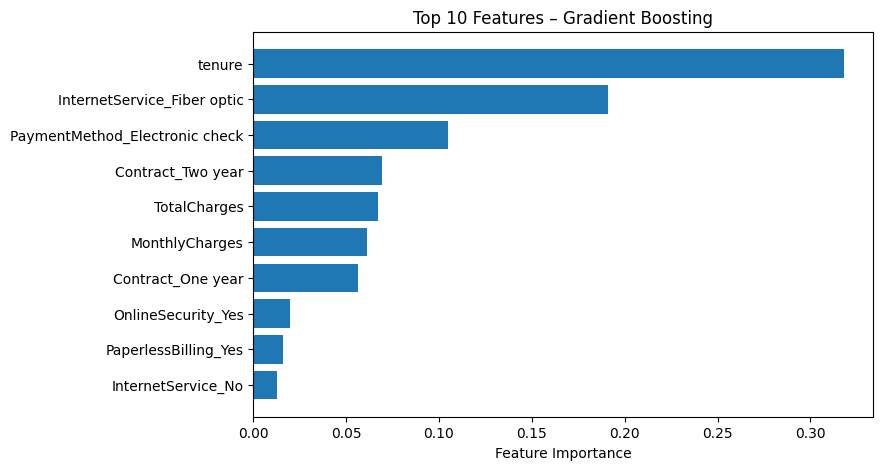

In [68]:

top_features = gb_importance.head(10)

plt.figure(figsize=(8, 5))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 10 Features – Gradient Boosting")
plt.show()

In [72]:
import joblib

joblib.dump(gb, "../backend/model/churn_model.pkl")
joblib.dump(X.columns, "../backend/model/feature_columns.pkl")


['../backend/model/feature_columns.pkl']